In [56]:
from langgraph.graph import StateGraph, START, END
from langgraph.checkpoint.memory import InMemorySaver
from langchain_groq import ChatGroq
from dotenv import load_dotenv
from typing import TypedDict

In [57]:
load_dotenv()

True

In [58]:
llm = ChatGroq(model="llama-3.1-8b-instant")

In [59]:
class JokeState(TypedDict):
    topic:str
    joke:str
    explanation:str

In [60]:
def joke_generator(state: JokeState):
    prompt=f"generate a joke on the topic {state['topic']}"
    response=llm.invoke(prompt).content
    return {'joke':response}


def explaination_generator(state: JokeState):
    prompt=f"write an explanation fot the joke - {state['joke']}"
    response=llm.invoke(prompt).content
    
    return {'explanation':response}
    


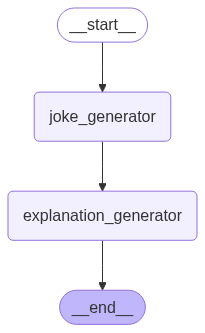

In [61]:

graph=StateGraph(JokeState)
graph.add_node("joke_generator",joke_generator)
graph.add_node("explanation_generator",explaination_generator)

graph.add_edge(START,"joke_generator")
graph.add_edge("joke_generator","explanation_generator")
graph.add_edge("explanation_generator",END)

checkpointer=InMemorySaver()


workflow=graph.compile(checkpointer=checkpointer)
workflow

In [62]:
config1={"configurable":{"thread_id":"1"}}
workflow.invoke({"topic":"VIT Vellore placement"}, config=config1)

{'topic': 'VIT Vellore placement',
 'joke': "Why did the VIT Vellore student bring a ladder to the placement drive?\n\nBecause they wanted to 'take their chances' and 'elevate' their career prospects, but in the end, they 'stepped down' when they didn't get placed.",
 'explanation': "This joke is a play on words, using puns related to the concept of 'taking chances' and 'elevating' career prospects, but also referencing the physical act of stepping up or down a ladder. \n\nHere's a breakdown of the joke:\n\n1. The student 'wanted to take their chances' - This is a common phrase used to describe someone trying to seize an opportunity, in this case, a placement drive. It's a common idiomatic expression that means to try one's luck.\n\n2. 'Elevate their career prospects' - This is a phrase used to describe improving one's career situation or status. However, in this joke, it's also a play on the physical act of moving up a ladder.\n\n3. 'In the end, they stepped down' - When someone steps

In [63]:
workflow.get_state(config1)

StateSnapshot(values={'topic': 'VIT Vellore placement', 'joke': "Why did the VIT Vellore student bring a ladder to the placement drive?\n\nBecause they wanted to 'take their chances' and 'elevate' their career prospects, but in the end, they 'stepped down' when they didn't get placed.", 'explanation': "This joke is a play on words, using puns related to the concept of 'taking chances' and 'elevating' career prospects, but also referencing the physical act of stepping up or down a ladder. \n\nHere's a breakdown of the joke:\n\n1. The student 'wanted to take their chances' - This is a common phrase used to describe someone trying to seize an opportunity, in this case, a placement drive. It's a common idiomatic expression that means to try one's luck.\n\n2. 'Elevate their career prospects' - This is a phrase used to describe improving one's career situation or status. However, in this joke, it's also a play on the physical act of moving up a ladder.\n\n3. 'In the end, they stepped down' -

In [64]:
list(workflow.get_state_history(config1))

[StateSnapshot(values={'topic': 'VIT Vellore placement', 'joke': "Why did the VIT Vellore student bring a ladder to the placement drive?\n\nBecause they wanted to 'take their chances' and 'elevate' their career prospects, but in the end, they 'stepped down' when they didn't get placed.", 'explanation': "This joke is a play on words, using puns related to the concept of 'taking chances' and 'elevating' career prospects, but also referencing the physical act of stepping up or down a ladder. \n\nHere's a breakdown of the joke:\n\n1. The student 'wanted to take their chances' - This is a common phrase used to describe someone trying to seize an opportunity, in this case, a placement drive. It's a common idiomatic expression that means to try one's luck.\n\n2. 'Elevate their career prospects' - This is a phrase used to describe improving one's career situation or status. However, in this joke, it's also a play on the physical act of moving up a ladder.\n\n3. 'In the end, they stepped down' 

In [65]:
config2={"configurable":{"thread_id":"2"}}
workflow.invoke({"topic":"pizza"}, config=config2)

{'topic': 'pizza',
 'joke': 'Why was the pizza in a bad mood? \n\nBecause it was feeling a little crusty.',
 'explanation': 'The joke is a play on words, using a pun to create humor. The punchline "feeling a little crusty" has a double meaning.\n\nIn this context, "crusty" is a common description for pizza, referring to the outer layer of the bread (the crust). However, in everyday language, "feeling a little crusty" can also mean being in a bad mood or irritable.\n\nThe joke relies on the unexpected twist on the word\'s meaning, creating a clever connection between the setup ("the pizza in a bad mood") and the punchline. It\'s a lighthearted and amusing play on words that requires a quick mental shift to understand the pun.'}

In [66]:
workflow.get_state(config2)

StateSnapshot(values={'topic': 'pizza', 'joke': 'Why was the pizza in a bad mood? \n\nBecause it was feeling a little crusty.', 'explanation': 'The joke is a play on words, using a pun to create humor. The punchline "feeling a little crusty" has a double meaning.\n\nIn this context, "crusty" is a common description for pizza, referring to the outer layer of the bread (the crust). However, in everyday language, "feeling a little crusty" can also mean being in a bad mood or irritable.\n\nThe joke relies on the unexpected twist on the word\'s meaning, creating a clever connection between the setup ("the pizza in a bad mood") and the punchline. It\'s a lighthearted and amusing play on words that requires a quick mental shift to understand the pun.'}, next=(), config={'configurable': {'thread_id': '2', 'checkpoint_ns': '', 'checkpoint_id': '1f070997-62b7-6553-8002-37751c5d6769'}}, metadata={'source': 'loop', 'step': 2, 'parents': {}, 'thread_id': '2'}, created_at='2025-08-03T18:41:26.335214

In [67]:
list(workflow.get_state_history(config2))

[StateSnapshot(values={'topic': 'pizza', 'joke': 'Why was the pizza in a bad mood? \n\nBecause it was feeling a little crusty.', 'explanation': 'The joke is a play on words, using a pun to create humor. The punchline "feeling a little crusty" has a double meaning.\n\nIn this context, "crusty" is a common description for pizza, referring to the outer layer of the bread (the crust). However, in everyday language, "feeling a little crusty" can also mean being in a bad mood or irritable.\n\nThe joke relies on the unexpected twist on the word\'s meaning, creating a clever connection between the setup ("the pizza in a bad mood") and the punchline. It\'s a lighthearted and amusing play on words that requires a quick mental shift to understand the pun.'}, next=(), config={'configurable': {'thread_id': '2', 'checkpoint_ns': '', 'checkpoint_id': '1f070997-62b7-6553-8002-37751c5d6769'}}, metadata={'source': 'loop', 'step': 2, 'parents': {}, 'thread_id': '2'}, created_at='2025-08-03T18:41:26.33521

# Time Travel

In [70]:
workflow.get_state({"configurable":{"thread_id":"2","checkpoint_id":"1f070997-47db-6321-8000-f39a9307c190"}})

StateSnapshot(values={'topic': 'pizza'}, next=('joke_generator',), config={'configurable': {'thread_id': '2', 'checkpoint_id': '1f070997-47db-6321-8000-f39a9307c190'}}, metadata={'source': 'loop', 'step': 0, 'parents': {}, 'thread_id': '2'}, created_at='2025-08-03T18:41:23.518748+00:00', parent_config={'configurable': {'thread_id': '2', 'checkpoint_ns': '', 'checkpoint_id': '1f070997-47d6-6dae-bfff-b8afb268562b'}}, tasks=(PregelTask(id='92208978-4183-85e4-43ad-717ea19b94c8', name='joke_generator', path=('__pregel_pull', 'joke_generator'), error=None, interrupts=(), state=None, result={'joke': 'Why was the pizza in a bad mood? \n\nBecause it was feeling a little crusty.'}),), interrupts=())

In [71]:
workflow.invoke(None,{"configurable":{"thread_id":"2","checkpoint_id":"1f070997-47db-6321-8000-f39a9307c190"}} )

{'topic': 'pizza',
 'joke': 'Why did the pizza go to therapy? \n\nBecause it was feeling a little crusty.',
 'explanation': 'This joke is an example of a play on words, also known as a pun. A pun involves using a word or phrase that has multiple meanings or sounds similar to another word or phrase, often to create a humorous effect.\n\nIn this joke, the word "crusty" has a double meaning. \n\n1. In a literal sense, pizza dough is often crusty, which means it has a hard outer layer.\n2. In an idiomatic sense, "feeling a little crusty" is a common expression used to describe someone who is feeling grumpy, irritable, or a bit rough around the edges.\n\nBy using the word "crusty" in both senses, the joke creates a clever connection between the pizza\'s texture and its emotional state, making it a clever play on words and a amusing pun.'}

In [73]:
list(workflow.get_state_history(config2))

[StateSnapshot(values={'topic': 'pizza', 'joke': 'Why did the pizza go to therapy? \n\nBecause it was feeling a little crusty.', 'explanation': 'This joke is an example of a play on words, also known as a pun. A pun involves using a word or phrase that has multiple meanings or sounds similar to another word or phrase, often to create a humorous effect.\n\nIn this joke, the word "crusty" has a double meaning. \n\n1. In a literal sense, pizza dough is often crusty, which means it has a hard outer layer.\n2. In an idiomatic sense, "feeling a little crusty" is a common expression used to describe someone who is feeling grumpy, irritable, or a bit rough around the edges.\n\nBy using the word "crusty" in both senses, the joke creates a clever connection between the pizza\'s texture and its emotional state, making it a clever play on words and a amusing pun.'}, next=(), config={'configurable': {'thread_id': '2', 'checkpoint_ns': '', 'checkpoint_id': '1f07099a-f9fe-6eeb-8002-47d00a678bbd'}}, m

# Update State

In [74]:
workflow.update_state({"configurable":{"thread_id":"2","checkpoint_id":"1f070997-47db-6321-8000-f39a9307c190","checkpoint_ns":""}}, {"topic":"samosa"})

{'configurable': {'thread_id': '2',
  'checkpoint_ns': '',
  'checkpoint_id': '1f0709a2-0e21-66f9-8001-cd4ca647da04'}}

In [75]:
list(workflow.get_state_history(config2))

[StateSnapshot(values={'topic': 'samosa'}, next=('joke_generator',), config={'configurable': {'thread_id': '2', 'checkpoint_ns': '', 'checkpoint_id': '1f0709a2-0e21-66f9-8001-cd4ca647da04'}}, metadata={'source': 'update', 'step': 1, 'parents': {}, 'thread_id': '2'}, created_at='2025-08-03T18:46:12.744780+00:00', parent_config={'configurable': {'thread_id': '2', 'checkpoint_ns': '', 'checkpoint_id': '1f070997-47db-6321-8000-f39a9307c190'}}, tasks=(PregelTask(id='0924fc12-df5f-17da-805b-41c2802b3048', name='joke_generator', path=('__pregel_pull', 'joke_generator'), error=None, interrupts=(), state=None, result=None),), interrupts=()),
 StateSnapshot(values={'topic': 'pizza', 'joke': 'Why did the pizza go to therapy? \n\nBecause it was feeling a little crusty.', 'explanation': 'This joke is an example of a play on words, also known as a pun. A pun involves using a word or phrase that has multiple meanings or sounds similar to another word or phrase, often to create a humorous effect.\n\nI

In [76]:
workflow.invoke(None,{"configurable":{"thread_id":"2","checkpoint_id":"1f0709a2-0e21-66f9-8001-cd4ca647da04"}} )

{'topic': 'samosa',
 'joke': 'Why did the samosa go to therapy? \n\nBecause it was feeling crumby and wanted to fold its issues.',
 'explanation': 'This joke is a play on words that combines two common idioms with a clever twist related to the characteristics of a samosa.\n\nA samosa is a type of Indian snack that consists of a fried or baked pastry shell filled with spiced potatoes and peas. A key feature of a samosa is its folded shape, which is typically triangular or cone-like.\n\nThe phrase "feeling crumby" is an idiom that means feeling unwell or unhappy, often used to describe a person who is depressed or stressed. However, in this joke, "crumby" also has a double meaning, as the pastry shell of a samosa is often crumbly or fragile.\n\nThe punchline "wanted to fold its issues" is where the wordplay really happens. A person might say they want to "fold" their problems or concerns, meaning to tackle or resolve them. However, in this joke, the samosa literally wants to fold its iss

In [77]:
list(workflow.get_state_history(config2))

[StateSnapshot(values={'topic': 'samosa', 'joke': 'Why did the samosa go to therapy? \n\nBecause it was feeling crumby and wanted to fold its issues.', 'explanation': 'This joke is a play on words that combines two common idioms with a clever twist related to the characteristics of a samosa.\n\nA samosa is a type of Indian snack that consists of a fried or baked pastry shell filled with spiced potatoes and peas. A key feature of a samosa is its folded shape, which is typically triangular or cone-like.\n\nThe phrase "feeling crumby" is an idiom that means feeling unwell or unhappy, often used to describe a person who is depressed or stressed. However, in this joke, "crumby" also has a double meaning, as the pastry shell of a samosa is often crumbly or fragile.\n\nThe punchline "wanted to fold its issues" is where the wordplay really happens. A person might say they want to "fold" their problems or concerns, meaning to tackle or resolve them. However, in this joke, the samosa literally w